In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('airbnb.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe(exclude=['object'])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
(df.isna().sum()*100/df.shape[0]).round(2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [16]:
# working with missing values
df.loc[~df['name'].notnull(),'name']='Anonymous'

In [18]:
df.loc[~df['host_name'].notnull(),'host_name']='Anonymous_host'

In [24]:
num_df=df.select_dtypes(['int','float'])

In [25]:
num_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [26]:
cat_df=df.select_dtypes('object')

In [28]:
cat_df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


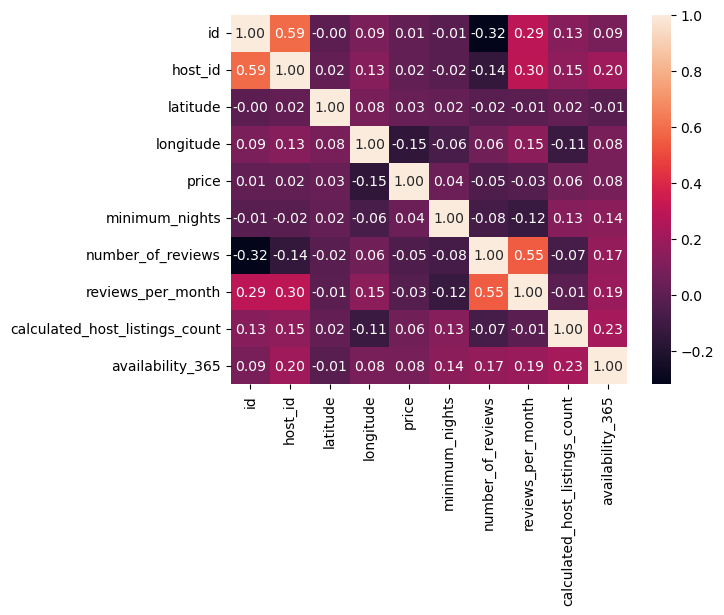

In [34]:
sns.heatmap(num_df.corr(),annot=True,fmt='.2f')
plt.show()

In [36]:
df.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

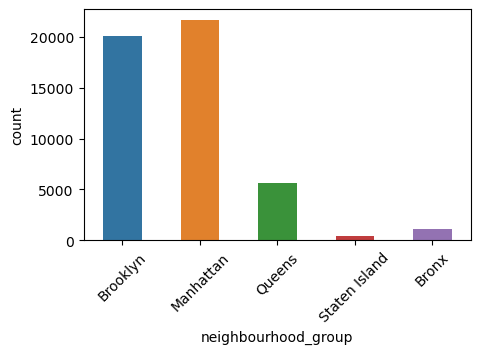

In [43]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='neighbourhood_group',width=.5)
plt.xticks(rotation=45)
plt.show()

In [45]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

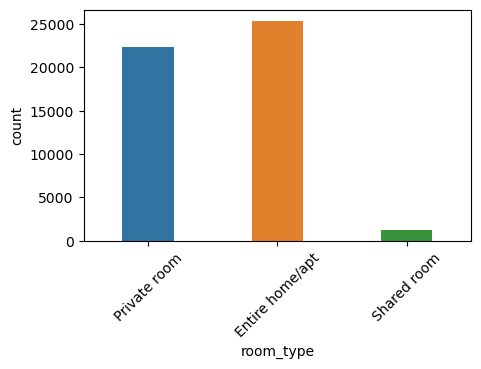

In [47]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='room_type',width=.4)
plt.xticks(rotation=45)
plt.show()

In [48]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

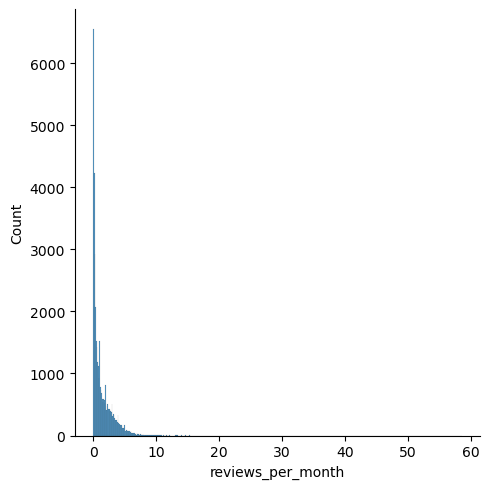

In [52]:
sns.displot(df['reviews_per_month'])
plt.show()

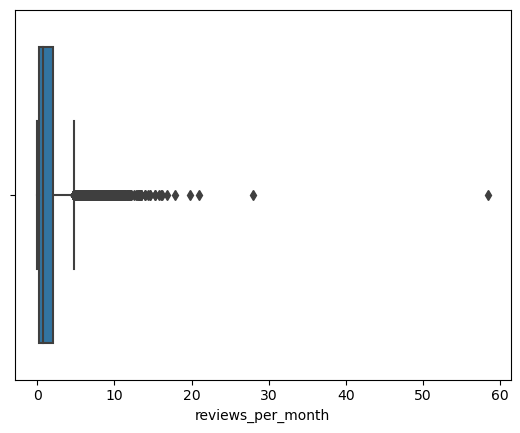

In [55]:
sns.boxplot(data=df,x='reviews_per_month',)
plt.show()

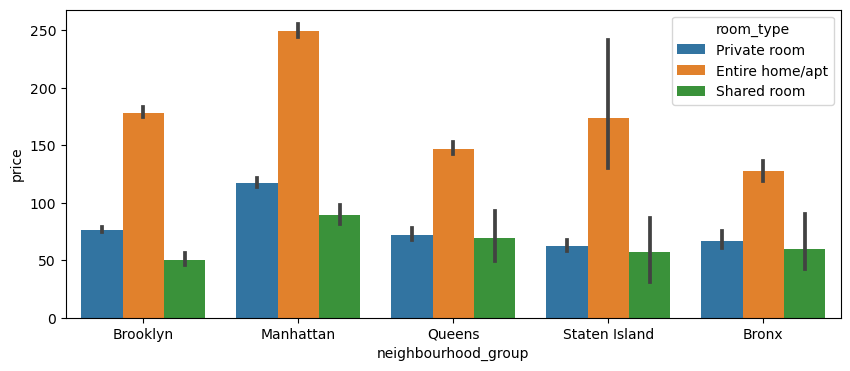

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')
plt.show()

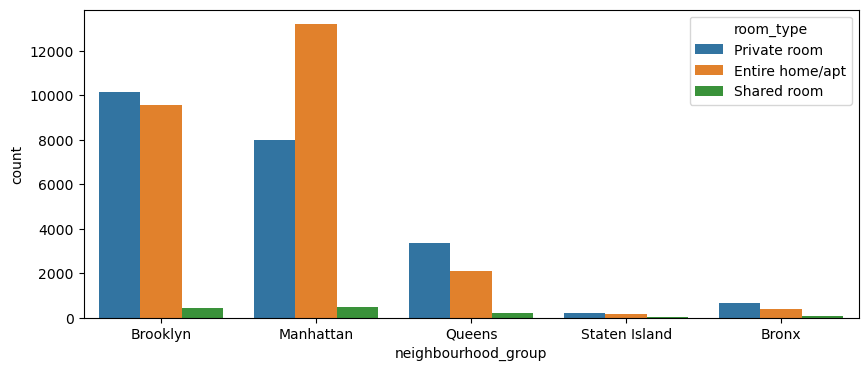

In [61]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')
plt.show()

In [71]:
df_ng_rt=df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index()
df_ng_rt.rename(columns={'id':'count'},inplace=True)
df_ng_rt.sort_values(by='count',ascending=False).head()

,neighbourhood_group,room_type,count
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372


In [74]:
# Checking duplicates
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [112]:
# Identify top 5 host based on number of properties they own
df_t5_host_id=df['host_id'].value_counts(ascending=False).head(5).reset_index()
df_t5_host_id.rename(columns={'index':'host_id','host_id':'host_count'},inplace=True)

In [113]:
df_t5_host_id

,host_id,host_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


In [114]:
df_t5_host_id1=df_t5_host_id.merge(df,on='host_id',how='left')[['host_id','host_name','host_count']]
df_t5_host_id1.head()

,host_id,host_name,host_count
0,219517861,Sonder (NYC),327
1,219517861,Sonder (NYC),327
2,219517861,Sonder (NYC),327
3,219517861,Sonder (NYC),327
4,219517861,Sonder (NYC),327


In [115]:
df_t5_host_id1.drop_duplicates(inplace=True)

In [116]:
df_t5_host_id1.reset_index(inplace=True)
df_t5_host_id1.drop('index',axis=1,inplace=True)

In [118]:
df_t5_host_id1

,host_id,host_name,host_count
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96


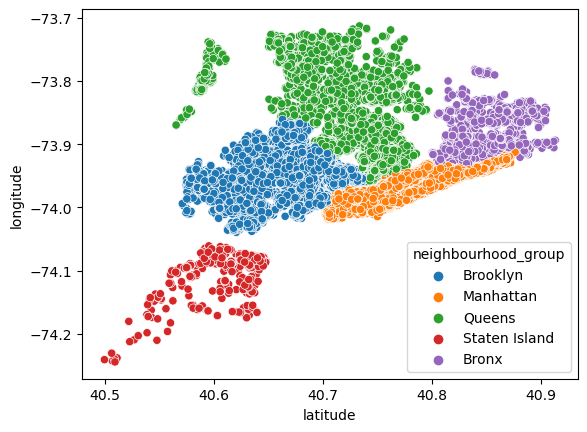

In [121]:
sns.scatterplot(data=df,x='latitude',y='longitude',hue='neighbourhood_group')
plt.show()

In [128]:
# sns.scatterplot(data=df,x='latitude',y='longitude',hue='neighbourhood')
# plt.legend(loc='upper right',prop={'size':2})
# plt.show()

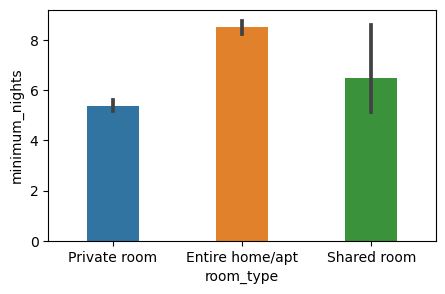

In [132]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='room_type',y='minimum_nights',width=.4)
plt.show()

In [135]:
df[['room_type','minimum_nights']].groupby("room_type",as_index=False).mean().round(2)

,room_type,minimum_nights
0,Entire home/apt,8.51
1,Private room,5.38
2,Shared room,6.48


In [137]:
df['last_review'].dtype

dtype('O')

In [140]:
df['last_review1']=pd.to_datetime(df['last_review'],format='%Y-%m-%d')

In [147]:
df['year']=df['last_review1'].dt.year
df['month']=df['last_review1'].dt.month
df['day']=df['last_review1'].dt.day

In [150]:
df_temp=df[df['neighbourhood_group']=='Manhattan'][['year','price']]

In [154]:
df_temp1=df_temp[df_temp['year'].notnull()].astype('int')

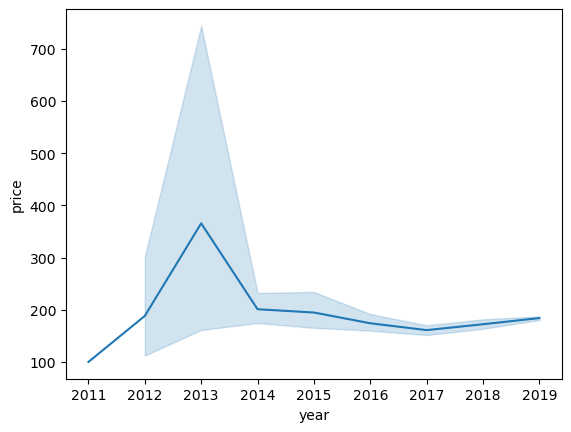

In [155]:
sns.lineplot(data=df_temp1,x='year',y='price')
plt.show()

In [157]:
df_temp2=df[df['year'].notnull()][['neighbourhood_group','year','price']]
df_temp2[['year','price']]=df_temp2[['year','price']].astype(int)

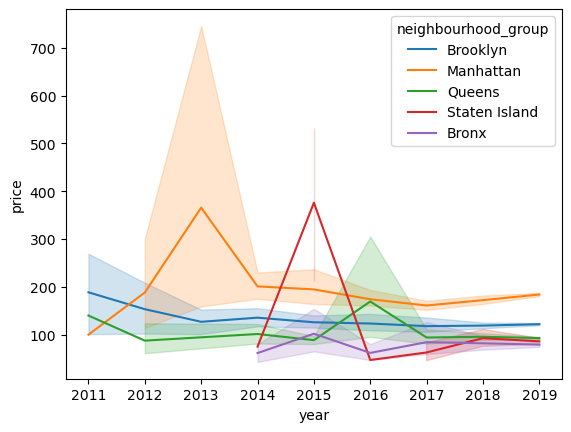

In [159]:
sns.lineplot(data=df_temp2,x='year',y='price',hue='neighbourhood_group')
plt.show()